# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf

# Loading Dataset

In [2]:
ipl = pd.read_csv('ipl_data.csv')

In [3]:
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
ipl.shape

(76014, 15)

In [5]:
ipl.dtypes

mid                 int64
date               object
venue              object
bat_team           object
bowl_team          object
batsman            object
bowler             object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
striker             int64
non-striker         int64
total               int64
dtype: object

In [6]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [7]:
ipl.isna().any()

mid               False
date              False
venue             False
bat_team          False
bowl_team         False
batsman           False
bowler            False
runs              False
wickets           False
overs             False
runs_last_5       False
wickets_last_5    False
striker           False
non-striker       False
total             False
dtype: bool

# Preprocessing Data

In [8]:
ipl.columns

Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')

In [9]:
#Dropping certain features 
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


In [10]:
df

,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
...,...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129


# Model Development

In [11]:
df.columns

Index(['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'total'], dtype='object')

In [12]:
X = df.drop(['total'], axis=1)
y= df['total']

In [16]:
X

,venue,bat_team,bowl_team,batsman,bowler
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar
...,...,...,...,...,...
76009,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian
76010,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian
76011,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian
76012,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian


# Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
# Create a LabelEncoder object for each categorical feature

venue_encoder = LabelEncoder()
bat_team_encoder = LabelEncoder()
bowl_team_encoder = LabelEncoder()
batsman_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

In [17]:
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = bat_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowl_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = batsman_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

# Train Test Split Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Feature Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

array([[0.52941176, 0.15384615, 0.92307692, 0.29756098, 0.3902439 ],
       [0.26470588, 0.23076923, 0.15384615, 0.41707317, 0.2195122 ],
       [1.        , 0.53846154, 0.        , 0.32439024, 0.69512195],
       ...,
       [0.20588235, 0.53846154, 0.        , 0.70731707, 0.02134146],
       [0.47058824, 0.30769231, 0.76923077, 0.54634146, 0.15243902],
       [0.23529412, 0.15384615, 0.53846154, 0.94146341, 0.07621951]])

# Define Neural Network Model

In [26]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])
 
# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

# Model Training

In [29]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
796/796 [==============================] - 5s 5ms/step - loss: 32.4463 - val_loss: 22.2833
Epoch 2/50
796/796 [==============================] - 4s 5ms/step - loss: 22.3373 - val_loss: 21.9759
Epoch 3/50
796/796 [==============================] - 4s 5ms/step - loss: 22.2968 - val_loss: 21.9121
Epoch 4/50
796/796 [==============================] - 4s 5ms/step - loss: 22.2796 - val_loss: 21.8405
Epoch 5/50
796/796 [==============================] - 4s 5ms/step - loss: 22.2516 - val_loss: 21.8248
Epoch 6/50
796/796 [==============================] - 4s 5ms/step - loss: 22.1793 - val_loss: 22.1333
Epoch 7/50
796/796 [==============================] - 4s 5ms/step - loss: 22.1389 - val_loss: 21.8948
Epoch 8/50
796/796 [==============================] - 4s 5ms/step - loss: 22.1855 - val_loss: 21.7472
Epoch 9/50
796/796 [==============================] - 3s 4ms/step - loss: 22.1133 - val_loss: 21.7260
Epoch 10/50
796/796 [==============================] - 3s 4ms/step - loss: 22.1237

<Axes: >

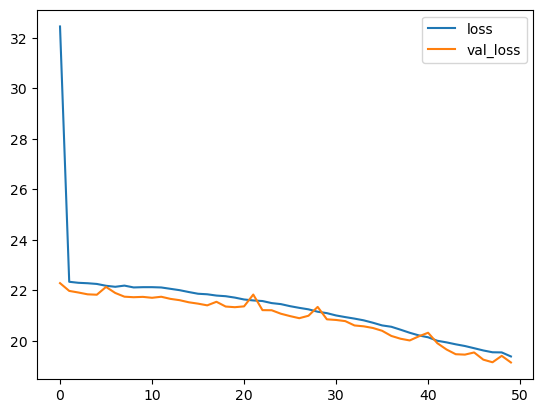

In [30]:
   
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

# Model Evaluation

In [31]:
# Make predictions
predictions = model.predict(X_test_scaled)
 
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

784/784 [==============================] - 2s 2ms/step


19.633102813592963

In [34]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
bat_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(), description='Select Batting Team:')
bowl_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Batting Team:')
batsman = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Batsman:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
	with output:
		clear_output() # Clear the previous output
		

		# Decode the encoded values back to their original values
		decoded_venue = venue_encoder.transform([venue.value])
		decoded_batting_team = bat_team_encoder.transform([batting_team.value])
		decoded_bowling_team = bowl_team_encoder.transform([bowling_team.value])
		decoded_striker = batsman_encoder.transform([batsman.value])
		decoded_bowler = bowler_encoder.transform([bowler.value])


		input = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
		input = input.reshape(1,5)
		input = scaler.transform(input)
		#print(input)
		predicted_score = model.predict(input)
		predicted_score = int(predicted_score[0,0])

		print(predicted_score)


In [35]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, bat_team, bowl_team, batsman, bowler, predict_button, output)


Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Batsman:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()